**TAMSIN ROGERS**

Spring 2021

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [188]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here â€” visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

In [243]:
poly_data = data.Data("data/poly_data.csv")
lin_reg = linear_regression.LinearRegression(poly_data)
lin_reg.poly_regression("X", "Y", p=1)

msse:
71.81095284569933
R2:
0.6932566071471753


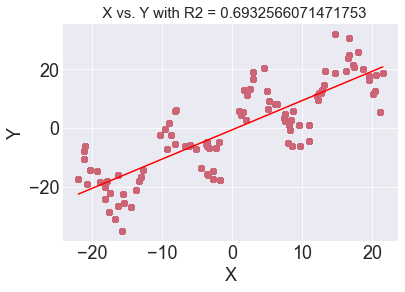

In [271]:
lin_reg.scatter("X", "Y", " ")
print("msse:")
print(lin_reg.m_sse)
print("R2:")
print(lin_reg.R2)

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

msse:
55.030880732781014
R2:
0.764933364636961


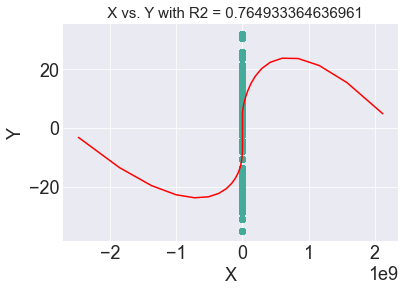

In [270]:
poly_data2 = data.Data("data/poly_data.csv")
lin_reg2 = linear_regression.LinearRegression(poly_data2)
lin_reg2.poly_regression("X", "Y", 7)
lin_reg2.scatter("X", "Y", " ")
print("msse:")
print(lin_reg2.m_sse)
print("R2:")
print(lin_reg2.R2)

**Question 5:** Describe the fit compared to `p=1` â€” is it better or worse? Why?


**Question 6:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7.


msse:
68.56155885782587
R2:
0.7071365251409882


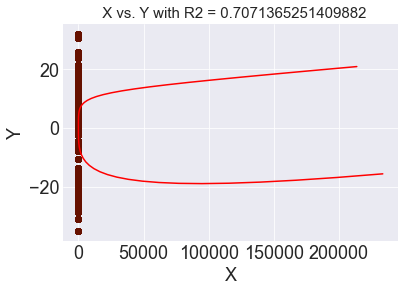

In [272]:
#experiments
poly_data2 = data.Data("data/poly_data.csv")
lin_reg2 = linear_regression.LinearRegression(poly_data2)
lin_reg2.poly_regression("X", "Y", 4)
lin_reg2.scatter("X", "Y", " ")
print("msse:")
print(lin_reg2.m_sse)
print("R2:")
print(lin_reg2.R2)

msse:
69.87982260694507
R2:
0.701505508157429


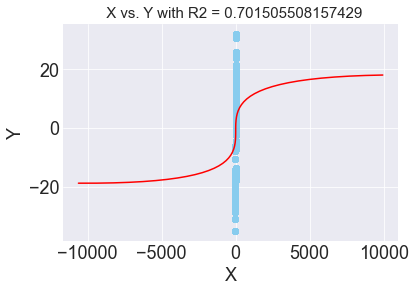

In [273]:
poly_data2 = data.Data("data/poly_data.csv")
lin_reg2 = linear_regression.LinearRegression(poly_data2)
lin_reg2.poly_regression("X", "Y", 3)
lin_reg2.scatter("X", "Y", " ")
print("msse:")
print(lin_reg2.m_sse)
print("R2:")
print(lin_reg2.R2)

**Answer 5:** 
As the degree increases, the R2 value increases and the msse decreases. Even degree values create graphs that tend to look like sideways parabolas and odd degree values tend to create graphs that tend to look like some variation of a sin graph.

**Answer 6:** 
P=7 is a better fit because the msse is slower (less error).  The fit comparisons are difficult to evaluate from the graphs alone, though because of the spacing of the poitns decreases as the p degree increases.

## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [251]:
fitset = data.Data("data/poly_data.csv")
fn = fitset.get_num_samples()
fhalf = int(fn*.5)
fitset.limit_samples(0,fhalf)
print(fitset)

valset = data.Data("data/poly_data.csv")
vn = valset.get_num_samples()
vhalf = int(vn*.5)
valset.limit_samples(vhalf,(vn+1))
print(valset)

data/poly_data.csv(50, 2)
['X', 'Y']
-------------------------------
[ 2.147 11.382]
[9.465 1.034]
[ 4.52  20.251]
[1.974 2.89 ]
[-3.358 -6.809]

data/poly_data.csv(50, 2)
['X', 'Y']
-------------------------------
[-3.65  -4.658]
[ 9.69  -6.107]
[-21.986 -17.271]
[-8.694 -2.22 ]
[-15.536 -25.608]



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

MSSE:
88.58467771864787
R^2:
0.6863898169307059
0.6863898169307059


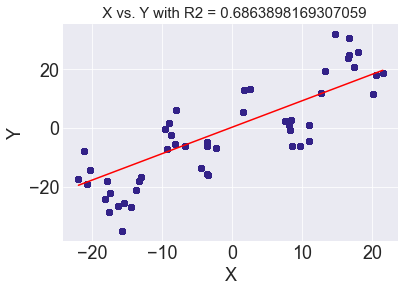

In [261]:
fitset = data.Data("data/poly_data.csv")
fn = fitset.get_num_samples()
fhalf = int(fn*.5)
fitset.limit_samples(0,fhalf)
valset = data.Data("data/poly_data.csv")
vn = valset.get_num_samples()
vhalf = int(vn*.5)
valset.limit_samples(vhalf,(vn+1))

fit_linreg = linear_regression.LinearRegression(fitset)
fit_linreg.linear_regression(["X"],"Y")
fslope = fit_linreg.slope
fintercept = fit_linreg.intercept
fp = fit_linreg.p

val_linreg = linear_regression.LinearRegression(valset)
val_linreg.linear_regression(["X"], "Y", )
val_linreg.initialize(["X"], "Y", fslope, fintercept, fp)

val_linreg.scatter("X", "Y", " ")

print("MSSE:")
print(val_linreg.m_sse)
print("R^2:")
print(val_linreg.r_squared(val_linreg.predict()))
print(val_linreg.R2)

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

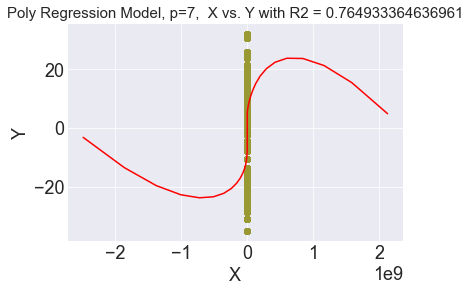

In [291]:
#Fit a polynomial regression model with  𝑝=7  on the fit set.
poly_data3 = data.Data("data/poly_data.csv")
lin_reg3 = linear_regression.LinearRegression(poly_data2)
lin_reg3.poly_regression("X", "Y", p=7)
lin_reg3.scatter("X", "Y", "Poly Regression Model, p=7, ")

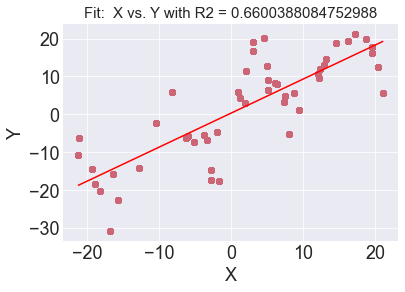

In [330]:
#Showing the fit set and regression curve fitted to it.

fitset = data.Data("data/poly_data.csv")
fn = fitset.get_num_samples()
fhalf = int(fn*.5)
fitset.limit_samples(0,fhalf)

valset = data.Data("data/poly_data.csv")
vn = valset.get_num_samples()
vhalf = int(vn*.5)
valset.limit_samples(vhalf,(vn+1))

fit_linreg = linear_regression.LinearRegression(fitset)
fit_linreg.linear_regression(["X"],"Y")
fslope = fit_linreg.slope
fintercept = fit_linreg.intercept
fp = fit_linreg.p

fit_linreg.scatter("X", "Y", "Fit: ")

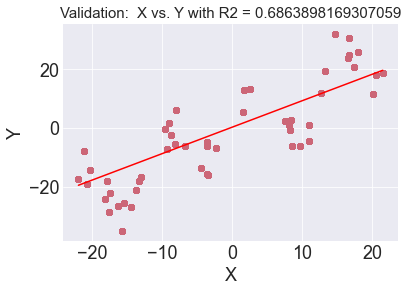

In [331]:
#Showing the validation set and regression curve that uses the fitted coefficients to the fit set.

val_linreg = linear_regression.LinearRegression(valset)
val_linreg.linear_regression(["X"], "Y")
val_linreg.initialize(["X"], "Y", fslope, fintercept, fp)

val_linreg.scatter("X", "Y", "Validation: ")

In [310]:
print("validation MSSE:")
print(val_linreg.m_sse)
print("validation R^2:")
print(val_linreg.r_squared(val_linreg.predict()))
print("fit MSSE:")
print(fit_linreg.m_sse)
print("fit R^2:")
print(fit_linreg.r_squared(fit_linreg.predict()))

validation MSSE:
96.45877456854069
validation R^2:
0.6585136986425835
fit MSSE:
38.30258184051851
fit R^2:
0.7815173867606515


**Question 7:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 8:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSSE, $R^2$).

**Question 9:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 10:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSSE, $R^2$).

**Answer 7:**
The fit set is better than the validation set because the msse is lower for the fit set than the validation set, meaning that the mean error is lower, so the coefficients do a good job.  
**Answer 8:** 
The generalization immproves for polynomial degrees <7 because the msse increases and the r2 value decreases.
**Answer 9:** 
Polynomial degrees less than 7 generalize acceptably to the validation set because msse decreases and r2 increases up until that point.
**Answer 10:**
The generalization worsens for polynomial degrees in the range 7-13.  
(show in cells below)

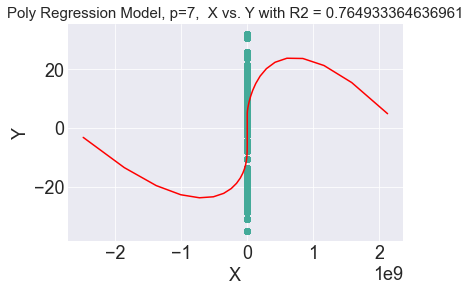

In [332]:
#Fit a polynomial regression model with  𝑝=7  on the fit set.
poly_data3 = data.Data("data/poly_data.csv")
lin_reg3 = linear_regression.LinearRegression(poly_data2)
lin_reg3.poly_regression("X", "Y", p=7)
lin_reg3.scatter("X", "Y", "Poly Regression Model, p=7, ")

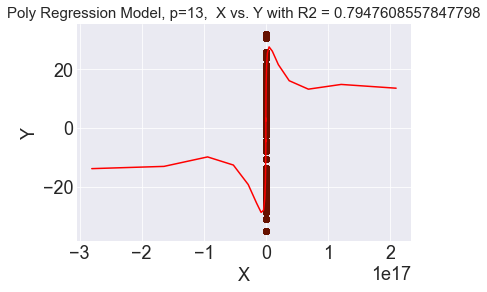

In [333]:
#Fit a polynomial regression model with  𝑝=13  on the fit set.
poly_data3 = data.Data("data/poly_data.csv")
lin_reg3 = linear_regression.LinearRegression(poly_data2)
lin_reg3.poly_regression("X", "Y", p=13)
lin_reg3.scatter("X", "Y", "Poly Regression Model, p=13, ")

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

data/covid.csv(188, 12)
['Date', 'Confirmed Global Cases', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']
-------------------------------
[20200122.        555.         17.         28.        510.          0.
        0.          0.          3.06        5.05       60.71        6.  ]
[20200123.        654.         18.         30.        606.         99.
        1.          2.          2.75        4.59       60.          8.  ]
[20200124.        941.         26.         36.        879.        287.
        8.          6.          2.76        3.83       72.22        9.  ]
[20200125.       1434.         42.         39.       1353.        493.
       16.          3.          2.93        2.72      107.69       11.  ]
[20200126.       2118.         56.         52.       2010.        684.
       14.         13.          2.64        2.46      107.69       13.  ]

1
2
msse:
224

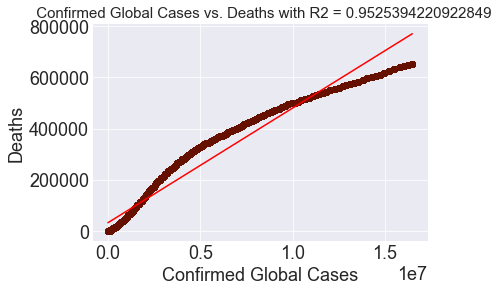

In [362]:

ext_data = data.Data('data/covid.csv')
print(ext_data)
ext_lin_reg = linear_regression.LinearRegression(ext_data)
ext_lin_reg.linear_regression(['Confirmed Global Cases'], 'Deaths', )
print("msse:")
print(ext_lin_reg.m_sse)
print("R2:")
print(ext_lin_reg.R2)

ext_lin_reg.scatter('Confirmed Global Cases', 'Deaths', ' ')
ext_lin_reg.show()

# hypothesis: confirmed global cases and deaths will be highly associated because more people 
# are dying of covid as more cases occur globally

Hypothesis: confirmed global cases will be highly associated with deaths and new recovered because the total number of covid cases is increasing as these other two values are increasing

2
1
7
1
1
2
7
2
1
7
2
7


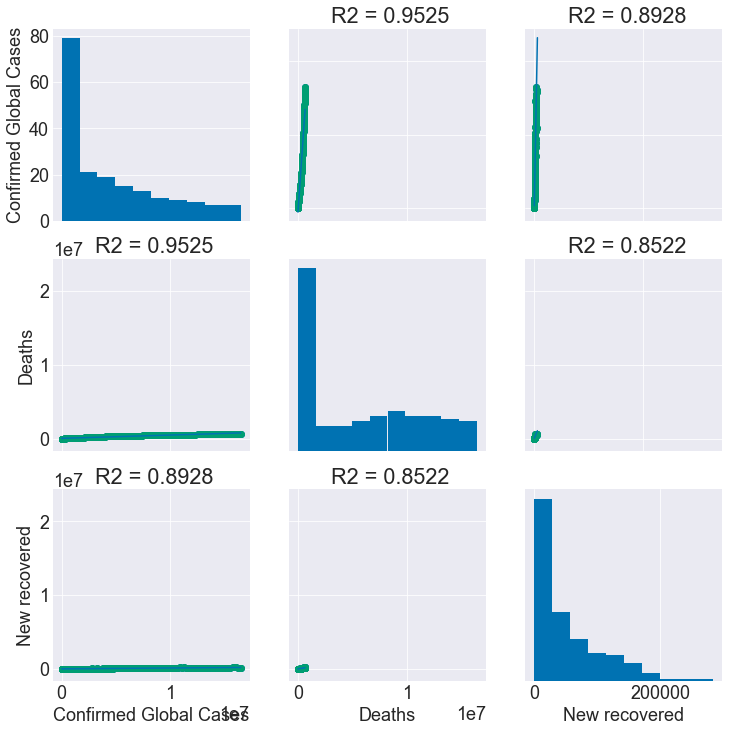

In [361]:
headers = ['Confirmed Global Cases', 'Deaths', "New recovered"]
ext_lin_reg.pair_plot(headers, hists_on_diag=True)

1
2
1
2
msse:
39810164602.704254
R2:
0.15728681569094272


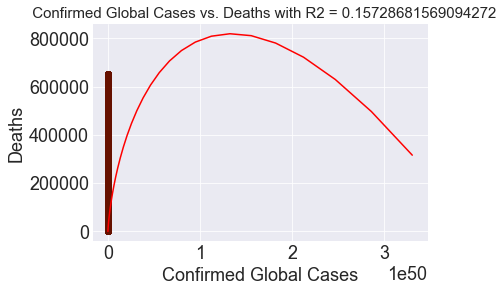

In [366]:
# Confirmed Global Cases vs. Deaths -  expecting an association

lin_reg5 = linear_regression.LinearRegression(ext_data)
lin_reg5.poly_regression("Confirmed Global Cases", "Deaths", 7)
lin_reg5.scatter("Confirmed Global Cases", "Deaths", " ")
print("msse:")
print(lin_reg5.m_sse)
print("R2:")
print(lin_reg5.R2)

10
11
10
11
msse:
2658.3866214761265
R2:
0.370842664427391


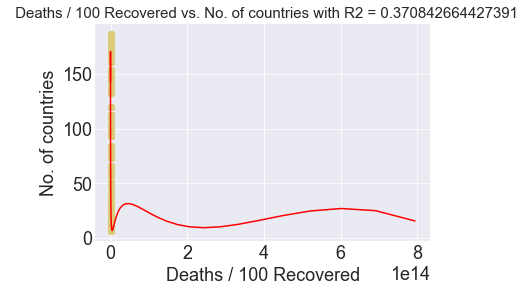

In [367]:
# Deaths / 100 Recovered vs. No. of countries - not expecting an association

lin_reg6 = linear_regression.LinearRegression(ext_data)
lin_reg6.poly_regression("Deaths / 100 Recovered", "No. of countries", 7)
lin_reg6.scatter("Deaths / 100 Recovered", "No. of countries", " ")
print("msse:")
print(lin_reg6.m_sse)
print("R2:")
print(lin_reg6.R2)

In [386]:
# experimenting with loops and degrees of polynomial

dat = data.Data("data/poly_data.csv")
test = linear_regression.LinearRegression(dat)

for i in range(10):
    test.poly_regression("X", "Y", p=i)
    test.scatter("X", "Y", "Poly Regression Model")

    # need subplots to do this!!

0
1


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 0 is different from 1)

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.

References: Rayna Hata & Nicole Matamoros